## T20 International Cricket Data Analysis

Cricket, particularly the fast-paced and thrilling format of T20 International (T20I) cricket, has captured the hearts of fans worldwide. This notebook embarks on an exciting journey to explore, analyse, and derive meaningful insights from T20I data, focusing on both ball-by-ball details and the creation of a comprehensive rating system for batters, bowlers, and all-rounders.

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

t20_data = pd.read_csv('data_files/ball_by_ball_it20.csv')

### Methods of Dismissal

 We will start of by using the ball by ball data to create pie chart detailing the relative occurence of all the different methods of dismissal.

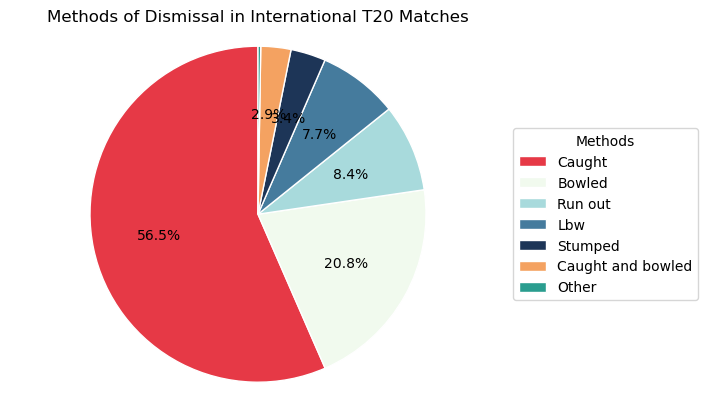

In [10]:
# Filter data frame to get rid of N/A values in the method column
filtered_df = t20_data[t20_data['Method'] != 'N/A']

# Count values in filtered data frame
value_counts = filtered_df['Method'].value_counts()

threshold = 50  # Set the minimum occurrence count for displaying a slice

# Filter out the methods with occurrence count below the threshold
filtered_value_counts = value_counts[value_counts >= threshold]

# Create a custom "Other" category to group rare methods below the threshold
other_count = value_counts[value_counts < threshold].sum()
filtered_value_counts['Other'] = other_count

# Capitalize the first letter of each label using str.capitalize()
labels = filtered_value_counts.index.str.capitalize()

# Define custom colors for the pie chart slices
colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557', '#F4A261', '#2A9D8F']

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the pie chart with the filtered value counts, remove percentages < 1%
def autopct_filter(pct):
    return f'{pct:.1f}%' if pct >= 1 else ''

wedges, texts, _ = ax.pie(
    filtered_value_counts,
    labels=None,  # Remove labels for now
    autopct=autopct_filter,  # Customize autopct to filter percentages
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'},  # Add white edge color for better visibility
)

# Add a legend with custom labels
ax.legend(labels, title="Methods", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Set the title
plt.title('Methods of Dismissal in International T20 Matches')

plt.show()


### Runs and Wickets per Over

In order to get an understadning of trends in scoring and wicket taking throughout the course of a T20 innings, we plot average runs per over as well as average wickets per over for overs 1-20.

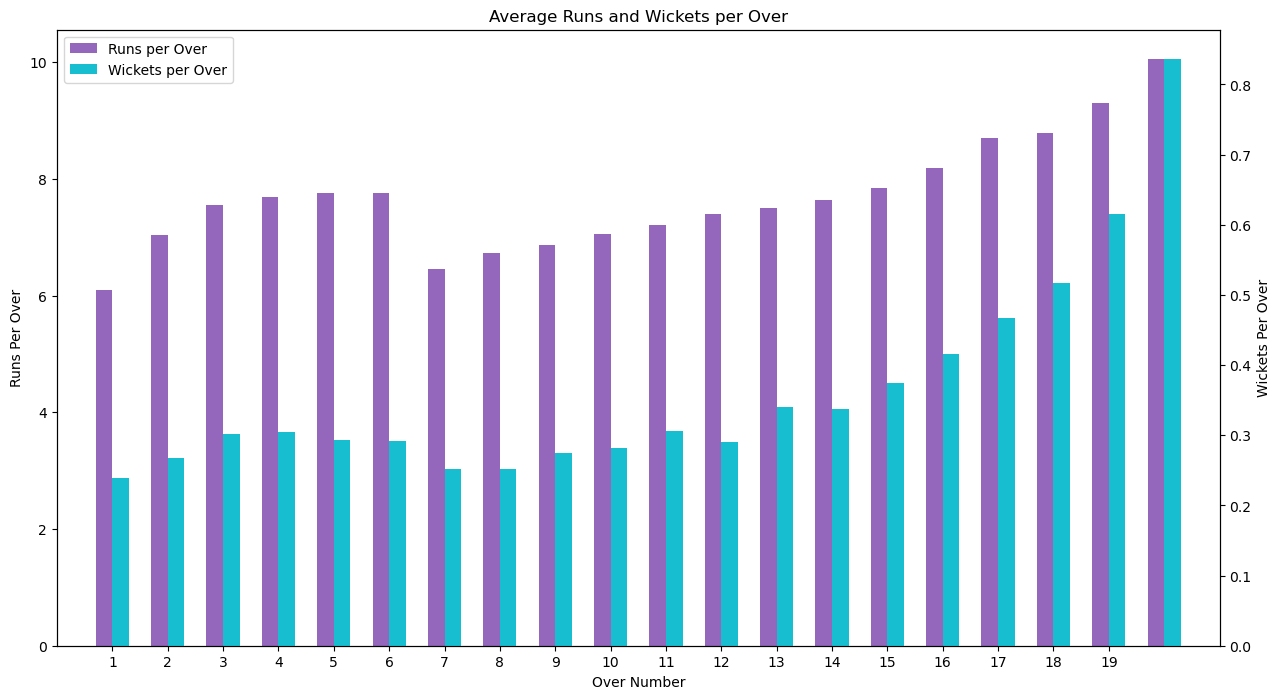

In [11]:
overs = list(np.arange(1,21))
Rpo = []
Wpo = []
for over in overs:
    over_df = t20_data.loc[t20_data['Over'] == over]   
    total_balls = len(over_df[over_df['Ball Rebowled'] == 0].index)
    avg_wick_pb = over_df['Wicket'].sum()/(total_balls)
    avg_pb = over_df['Runs From Ball'].sum()/(total_balls)
    Wpo.append(avg_wick_pb*6)
    Rpo.append(avg_pb*6)


# Create a figure and axis object
fig , ax = plt.subplots(figsize=(15, 8))

# Set the x-axis label
ax.set_xlabel('Over Number')

# Set the y-axis label for the first field
ax.set_ylabel('Runs Per Over', color='k')

# Create the bar chart for the first field
ax.bar(np.array(overs) - 0.15, Rpo, color='tab:purple', label='Runs per Over', width=0.3)

# Create a second y-axis object
ax2 = ax.twinx()

# Set the y-axis label for the second field
ax2.set_ylabel('Wickets Per Over', color='k')

# Create the bar chart for the second field
ax2.bar(np.array(overs) + 0.15, Wpo, color='tab:cyan',label = 'Wickets per Over', width=0.3)

# Set the x-axis limits to ensure all bars are visible
ax.set_xlim([0, 21])
# create the legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.xticks(np.arange(1, 20, step=1))
# Show the plot
plt.title('Average Runs and Wickets per Over')
plt.show()








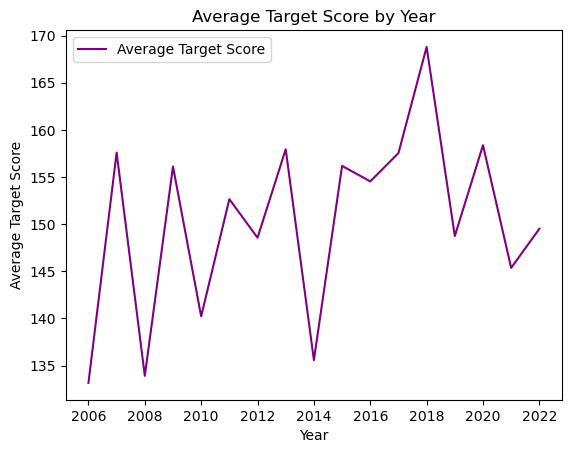

In [12]:
years = ['2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
year_targets = []
for year in years:
    targets = []
    year_df = t20_data[t20_data['Date'].str.slice(stop=4) == year]
    
    for j in range(len(year_df.index)-1):
        if year_df['Match ID'].iloc[j] != year_df['Match ID'].iloc[j+1]:
            targets.append(year_df['Target Score'].iloc[j])
    
    year_targets.append(sum(targets)/len(targets))

df = pd.DataFrame({'Average Target Score': year_targets}, index=years)
# Plot the data against years

df.plot(kind='line', color='purple')

# Set the title and axis labels
plt.title('Average Target Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Target Score')

# Show the plot
plt.show()





The average first innings score changes often significantly from year to year, but there is not a simple pattern to it. However, since 2016 the average first innings score in IT20s has generally higher than most of the years preceeding 2016.

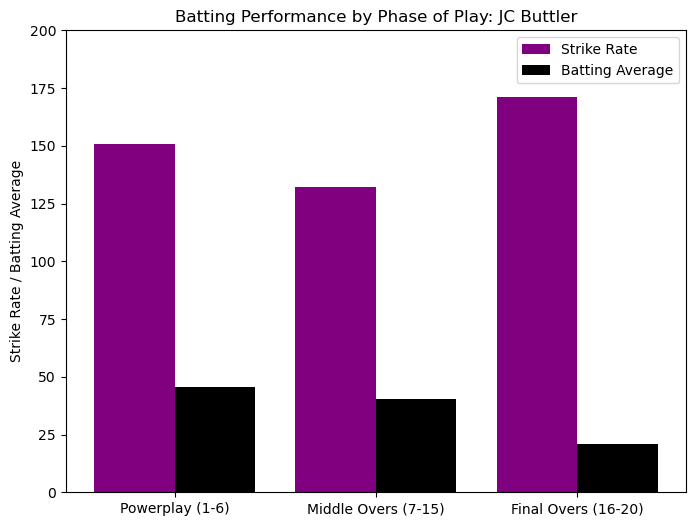

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

powerplay_df = t20_data.loc[(t20_data['Over'] >= 1) & (t20_data['Over'] <= 6)]
middle_df = t20_data.loc[(t20_data['Over'] >= 7) & (t20_data['Over'] <= 15)]
end_df = t20_data.loc[(t20_data['Over'] >= 16) & (t20_data['Over'] <= 20)]

player = 'JC Buttler'
dfs =[powerplay_df, middle_df, end_df]
AVGs = []
SRs = []
BASRAs = []
for df in dfs:
    player_mask = (df['Batter'] == player)
    batter_df = df.loc[player_mask]
    n_outs = len(df[df['Player Out'] == player].index)
    total_runs = sum(batter_df['Batter Runs'])
    total_bf = len(batter_df[batter_df['Ball Rebowled'] == 0].index)
    bat_avg = total_runs/n_outs
    sr = (total_runs/total_bf)*100
    basra = bat_avg + sr
    AVGs.append(bat_avg)
    SRs.append(sr)
    BASRAs.append(basra)



# Example data
stages = ['Powerplay (1-6)', 'Middle Overs (7-15)', 'Final Overs (16-20)']

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Set the x-axis labels and positions
x_labels = stages
x_positions = np.arange(len(x_labels))


ax.bar(x_positions, SRs, width=0.4, label='Strike Rate', color='purple')

# Plot the batting average bars

ax.bar(x_positions+0.4, AVGs, width=0.4, label='Batting Average', color = 'black')

# Set the y-axis limits and labels
ax.set_ylim([0, 200])
ax.set_ylabel('Strike Rate / Batting Average')

# Set the title and legend
ax.set_title('Batting Performance by Phase of Play: JC Buttler')
ax.legend()

# Add the x-axis labels and tick marks
ax.set_xticks(x_positions+0.2)
ax.set_xticklabels(x_labels)

plt.show()


    








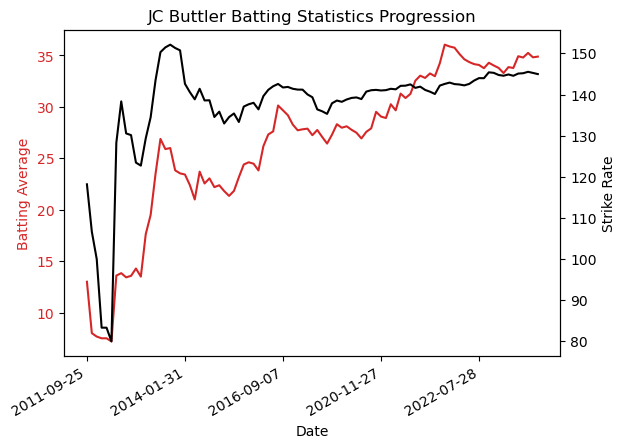

In [14]:
player = 'JC Buttler'

# SLice the data frame by when player is at the crease
player_df =t20_data[(t20_data['Batter' ]== player) | (t20_data['Non Striker'] == player)]

# Get a list of unique dates in date_col
unique_dates = player_df['Date'].unique()

# Sort the unique dates in ascending order
unique_dates_sorted = sorted(unique_dates)

player_data = []
n_outs = 0
total_runs = 0
total_bf = 0

for date in unique_dates_sorted:
    game_df = player_df[player_df['Date'] == date]
    batter_df = game_df[game_df['Batter'] == player]
    runs = batter_df['Batter Runs'].sum()
    # Check if any value in 'Player Out' column is equal to player
    if player in game_df['Player Out'].values:
        n_outs += 1
    bf = len(batter_df[batter_df['Ball Rebowled'] == 0].index)
    total_runs += runs
    total_bf += bf
    player_data.append([player, date, total_runs/n_outs, (total_runs/total_bf)*100])
    
player_data_df = pd.DataFrame(player_data, columns= ['Player', 'Date', 'Batting Average', 'Strike Rate'])
# Set up the plot
fig, ax1 = plt.subplots()

# Plot the first data set on the left y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Batting Average', color=color)
ax1.plot(player_data_df['Date'], player_data_df['Batting Average'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis on the right side of the plot
ax2 = ax1.twinx()

# Plot the second data set on the right y-axis
color = 'k'
ax2.set_ylabel('Strike Rate', color=color)
ax2.plot(player_data_df['Date'], player_data_df['Strike Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set the tick frequency on the x-axis
ax1.xaxis.set_major_locator(plt.MaxNLocator(6))

# Display legend
ax.legend()

# Format the dates on the x-axis
fig.autofmt_xdate()

plt.title('JC Buttler Batting Statistics Progression')

# Show the plot
plt.show()



/var/folders/dq/r162x_ld4ydb57pdv1b88jh00000gn/T/ipykernel_5556/3994179421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  middle_df['Date'] = pd.to_datetime(middle_df['Date'])


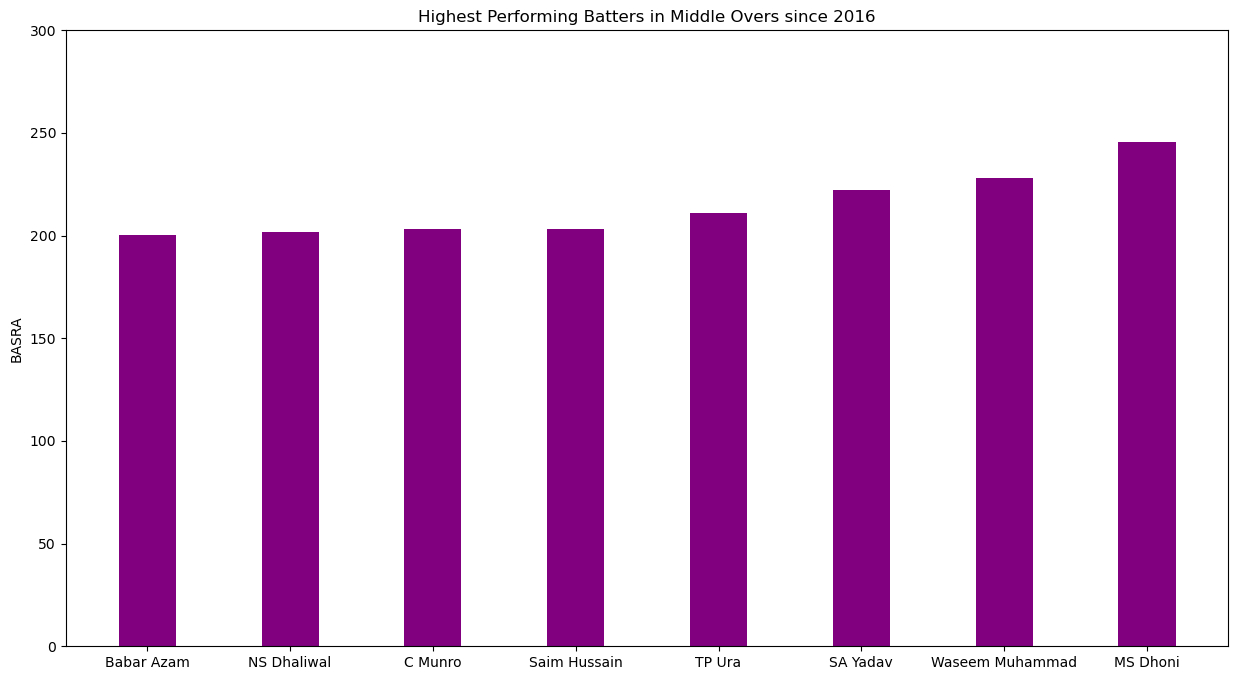

In [15]:
# Convert the "date" column to datetime format
middle_df['Date'] = pd.to_datetime(middle_df['Date'])

# Slice the dataframe by values in the "date" column after the year 2015
middle_df = middle_df[middle_df['Date'].dt.year > 2015]




# Get list of batters that have been at the crease during the middle overs in this period
batter_list = middle_df['Batter'].unique().tolist()
BATTER = []
BASRA = []
BASRA2 = []
for batter in batter_list:
    batter_df = middle_df.loc[middle_df['Batter'] == batter]
    
    
    if len(batter_df.index) > 200:
        BATTER.append(batter)
        n_outs = len(middle_df[middle_df['Player Out'] == batter].index)
        
        
        total_runs = sum(batter_df['Batter Runs'])
        total_bf = len(batter_df[batter_df['Ball Rebowled'] == 0].index)
        bat_avg = total_runs/n_outs
        sr = (total_runs/total_bf)*100
        BASRA.append(bat_avg + sr)
        BASRA2.append(2*bat_avg + sr)

# convert the list to a numpy array
BASRA = np.array(BASRA)

# get the indices of the 8 max values
max_indices = np.argsort(BASRA)[-8:]
max_batters = [BATTER[i]for i in max_indices]
max_BASRAs = [BASRA[i] for i in max_indices]

fig, ax = plt.subplots(figsize=(15, 8))

x_labels = max_batters
x_positions = np.arange(len(x_labels))

ax.bar(x_positions, max_BASRAs, width=0.4, label='BASRA', color='purple')

# Set the y-axis limits and labels
ax.set_ylim([0, 300])
ax.set_ylabel('BASRA')

# Add the x-axis labels and tick marks
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels)

# Set the title and legend
ax.set_title('Highest Performing Batters in Middle Overs since 2016')


plt.show()

        

    

There are some big names that rank atop the list of highest BA + SR since 2015, including Babar Azam and SKY, with MS Dhoni coming in at first.

/var/folders/dq/r162x_ld4ydb57pdv1b88jh00000gn/T/ipykernel_5556/2611403288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starts['Valid Ball'] = (starts['Ball Rebowled'] != 1).astype(int)


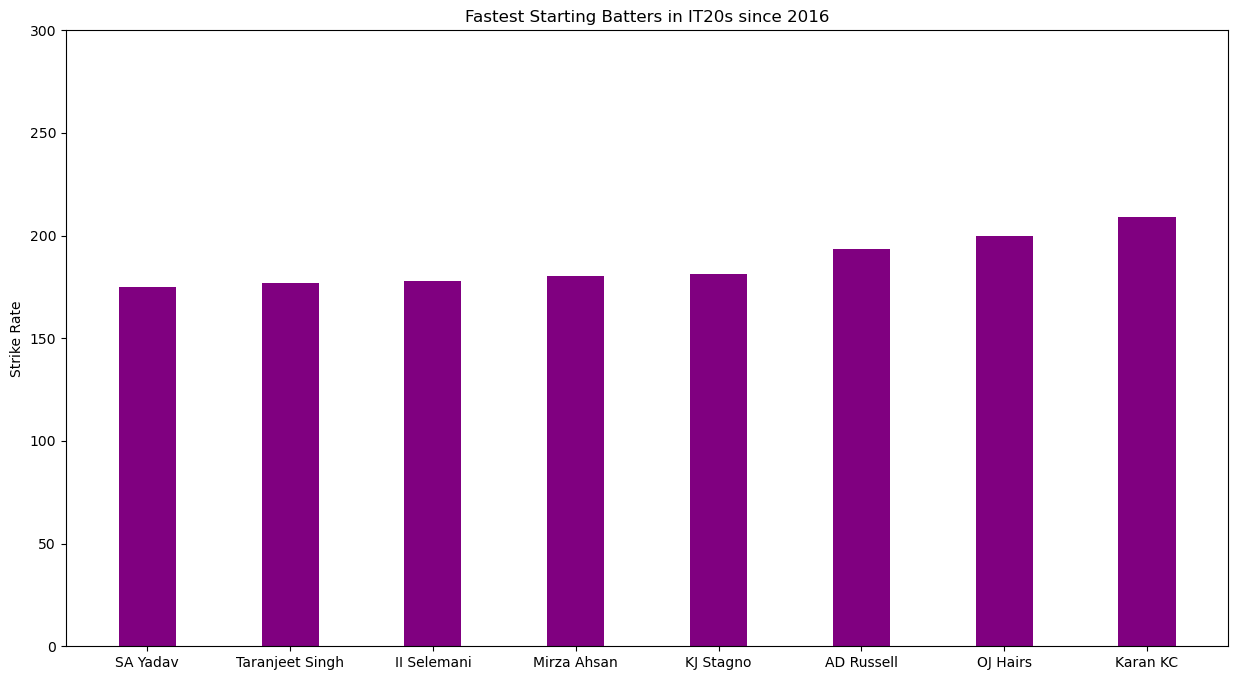

In [16]:
t20_data['Date'] = pd.to_datetime(t20_data['Date'])
starts = t20_data[t20_data['Date'].dt.year > 2015]
starts['Valid Ball'] = (starts['Ball Rebowled'] != 1).astype(int)
batter_list = starts['Batter'].unique().tolist()
SRs = []
batters = []
for batter in batter_list:
    
    batter_df = starts.loc[starts['Batter'] == batter]
    ids = batter_df['Match ID'].unique()
    first10 = []
    for match_id in ids:
        game_df = batter_df[batter_df['Match ID'] == match_id]
        cum_sum = 0
        index_to_stop = 0
        for index, row in game_df.iterrows():
            cum_sum += row['Valid Ball']
            if cum_sum >= 10:
                index_to_stop = index + 1
                break
        game_df = game_df.iloc[:index_to_stop]
        first10.append(game_df)
    first10 = pd.concat(first10, axis=0)
    if len(first10.index) > 100:
        batters.append(batter)
        SRs.append((first10['Batter Runs'].sum()/len(first10[first10['Ball Rebowled'] == 0].index))*100)
    

# convert the list to a numpy array
SRs = np.array(SRs)

# get the indices of the 8 max values
max_indices = np.argsort(SRs)[-8:]
max_batters = [batters[i]for i in max_indices]
max_SRs = [SRs[i] for i in max_indices]

fig, ax = plt.subplots(figsize=(15, 8))

x_labels = max_batters
x_positions = np.arange(len(x_labels))

ax.bar(x_positions, max_SRs, width=0.4, label='First 10 Balls of Innings Strike Rate', color='purple')

# Set the y-axis limits and labels
ax.set_ylim([0, 300])
ax.set_ylabel('Strike Rate')

# Add the x-axis labels and tick marks
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels)

# Set the title and legend
ax.set_title('Fastest Starting Batters in IT20s since 2016')


plt.show()
        
        
    

Suryakumar Yadav and Andre Russell rank among the fastest starers in T20Is since 2016.

## Batting and Bowling Statistics

In [17]:
import pandas as pd

df = t20_data.copy()

# Step 0: Create a 'valid_ball' column
df['Valid Ball'] = (df['Ball Rebowled'] != 1).astype(int)

# Step 1: Group by Batter and calculate the total runs and valid balls faced
grouped_runs_balls = df.groupby('Batter').agg(
    total_runs=('Batter Runs', 'sum'),
    balls_faced=('Valid Ball', 'sum'),
    innings=('Match ID', 'nunique')
)

# Step 2: Count the number of times each batter is out
outs = df.groupby('Player Out').size().reset_index(name='num_outs')
outs.rename(columns={'Player Out': 'Batter'}, inplace=True)

# Step 3: Merge the two dataframes on 'Batter'
merged = pd.merge(grouped_runs_balls, outs, on='Batter', how='left').fillna(0)

# Step 4: Calculate batting average and strike rate
merged['batting_avg'] = merged['total_runs'] / merged['num_outs'].replace(0, 1)  # handle potential division by zero
merged['strike_rate'] = (merged['total_runs'] / merged['balls_faced']) * 100

def get_batter_countries(row):
    countries = []
    if row['Innings'] == 1:
        team = row['Bat First']
    else:
        team = row['Bat Second']
    
    return team

# Apply the get_batter_countries function to each row
df['Batter Countries'] = df.apply(get_batter_countries, axis=1)

# Step 6: Merge the bowler's country information into the merged DataFrame
batter_countries = df.groupby('Batter')['Batter Countries'].unique().apply("/".join)
batter_data = pd.merge(batter_countries, merged, on='Batter', how='left')

batter_data['bf_pw'] = batter_data['balls_faced']/batter_data['num_outs']
batter_data['bf_pi'] = batter_data['balls_faced']/batter_data['innings']

batter_data['not_outs'] = batter_data['innings'] - batter_data['num_outs']
# Handle NaN values (possible division by zero scenarios)
batter_data.fillna(0, inplace=True)


# Reset index to have Batter as a column
result_df = batter_data.reset_index()[['Batter', 'Batter Countries', 'innings', 'not_outs', 'total_runs', 'balls_faced', 'num_outs', 'batting_avg', 'strike_rate', 'bf_pi', 'bf_pw']]
result_df.rename(columns={'Batter Countries':'Country'}, inplace=True)
result_df.to_csv('data_files/batting_stats_T20I.csv')


In [18]:
import pandas as pd

df = t20_data.copy()

# Step -1: Create a 'valid_ball' column
df.loc[:, 'Valid Ball'] = (df['Ball Rebowled'] != 1).astype(int)

# Step 0: Filter rows where Method suggests the bowler took a wicket
relevant_methods = ["bowled", "caught", "lbw", "stumped", "hit wicket", "caught & bowled"]
wickets_df = df[df['Method'].isin(relevant_methods)]

# Step 1: Group by Bowler to aggregate runs given, balls bowled, and wickets taken
bowler_data = df.groupby('Bowler').agg(
    runs_conceded=('Bowler Runs Conceded', 'sum'),
    balls_bowled=('Valid Ball', 'sum')
)
bowler_data['wickets'] = wickets_df.groupby('Bowler').size()

# Step 2: Calculate bowling average and economy
bowler_data['bowling_avg'] = bowler_data['runs_conceded'] / bowler_data['wickets']
bowler_data['economy'] = bowler_data['runs_conceded'] / (bowler_data['balls_bowled'] / 6)  # convert balls to overs
bowler_data['strike_rate'] = bowler_data['balls_bowled'] / bowler_data['wickets']

matches_bowled = df.groupby('Bowler')['Match ID'].nunique()
bowler_data['matches_bowled'] = matches_bowled


# Step 5: Determine the bowler's countries based on innings and team names
def get_bowler_countries(row):
    countries = []
    if row['Innings'] == 1:
        team = row['Bat Second']
    else:
        team = row['Bat First']
    
    return team

# Apply the get_bowler_countries function to each row
df['Bowler Countries'] = df.apply(get_bowler_countries, axis=1)

# Step 6: Merge the bowler's country information into the bowler_data DataFrame
bowler_countries = df.groupby('Bowler')['Bowler Countries'].unique().apply("/".join)

bowler_data['Country'] = bowler_countries

bowler_data['balls_bowled_pm'] = bowler_data['balls_bowled']/bowler_data['matches_bowled']
bowler_data['wickets_pm'] = bowler_data['wickets']/bowler_data['matches_bowled']

# Handle NaN values (possible division by zero scenarios)
bowler_data.fillna(0, inplace=True)

# Reset index to have Bowler as a column
bowler_result = bowler_data.reset_index()[['Bowler', 'Country', 'matches_bowled', 'wickets', 'balls_bowled','runs_conceded', 'bowling_avg', 'economy', 'strike_rate', 'balls_bowled_pm', 'wickets_pm']]

bowler_result.to_csv('data_files/bowling_stats_T20I.csv')


In [19]:
# List of ICC member nations
icc_member_nations = [
    'Afghanistan', 'Australia', 'Bangladesh', 'England', 'India',
    'Ireland', 'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka',
    'West Indies', 'Zimbabwe'
]

# Filter rows where both teams are ICC member nations
member_data = t20_data[
    (t20_data['Bat First'].isin(icc_member_nations)) &
    (t20_data['Bat Second'].isin(icc_member_nations))
]

member_data.reset_index(drop=True, inplace=True)

# Consider games from 2015 onwards
df = member_data.copy()
df['Date'] = pd.to_datetime(df['Date'])
date = '2021-08-01'
date = pd.to_datetime(date)
df = df[df['Date'] > date]

# Step -1: Create a 'valid_ball' column
df['Valid Ball'] = (df['Ball Rebowled'] != 1).astype(int)

# Step 0: Filter rows where Method suggests the bowler took a wicket
relevant_methods = ["bowled", "caught", "lbw", "stumped", "hit wicket", "caught & bowled"]
wickets_df = df[df['Method'].isin(relevant_methods)]

# Step 1: Group by Bowler to aggregate runs given, balls bowled, and wickets taken
bowler_data = df.groupby('Bowler').agg(
    runs_conceded=('Bowler Runs Conceded', 'sum'),
    balls_bowled=('Valid Ball', 'sum')
)
bowler_data['wickets'] = wickets_df.groupby('Bowler').size()

# Step 2: Calculate bowling average and economy
bowler_data['bowling_avg'] = bowler_data['runs_conceded'] / bowler_data['wickets']
bowler_data['economy'] = bowler_data['runs_conceded'] / (bowler_data['balls_bowled'] / 6)  # convert balls to overs
bowler_data['bowling_strike_rate'] = bowler_data['balls_bowled'] / bowler_data['wickets']

matches_bowled = df.groupby('Bowler')['Match ID'].nunique()
bowler_data['matches_bowled'] = matches_bowled


# Step 5: Determine the bowler's countries based on innings and team names
def get_bowler_countries(row):
    countries = []
    if row['Innings'] == 1:
        team = row['Bat Second']
    else:
        team = row['Bat First']
    
    return team

# Apply the get_bowler_countries function to each row
df['Bowler Countries'] = df.apply(get_bowler_countries, axis=1)

# Step 6: Merge the bowler's country information into the bowler_data DataFrame
bowler_countries = df.groupby('Bowler')['Bowler Countries'].unique().apply("/".join)
bowler_data['Country'] = bowler_countries

bowler_data['balls_bowled_pm'] = bowler_data['balls_bowled']/bowler_data['matches_bowled']
bowler_data['wickets_pm'] = bowler_data['wickets']/bowler_data['matches_bowled']

# Handle NaN values (possible division by zero scenarios)
bowler_data.fillna(0, inplace=True)

# Reset index to have Bowler as a column
bowlers = bowler_data.reset_index()[['Bowler', 'Country', 'matches_bowled', 'wickets', 'balls_bowled','runs_conceded', 'bowling_avg', 'economy', 'bowling_strike_rate', 'balls_bowled_pm', 'wickets_pm']]

df = member_data.copy()
df['Date'] = pd.to_datetime(df['Date'])
date = '2021-08-01'
date = pd.to_datetime(date)
df = df[df['Date'] > date]

# Step 0: Create a 'valid_ball' column
df['Valid Ball'] = (df['Ball Rebowled'] != 1).astype(int)

# Step 1: Group by Batter and calculate the total runs and valid balls faced
grouped_runs_balls = df.groupby('Batter').agg(
    total_runs=('Batter Runs', 'sum'),
    balls_faced=('Valid Ball', 'sum'),
    innings=('Match ID', 'nunique')
)

# Step 2: Count the number of times each batter is out
outs = df.groupby('Player Out').size().reset_index(name='num_outs')
outs.rename(columns={'Player Out': 'Batter'}, inplace=True)

# Step 3: Merge the two dataframes on 'Batter'
merged = pd.merge(grouped_runs_balls, outs, on='Batter', how='left').fillna(0)

# Step 4: Calculate batting average and strike rate
merged['batting_avg'] = merged['total_runs'] / merged['num_outs'].replace(0, 1)  # handle potential division by zero
merged['strike_rate'] = (merged['total_runs'] / merged['balls_faced']) * 100

def get_batter_countries(row):
    countries = []
    if row['Innings'] == 1:
        team = row['Bat First']
    else:
        team = row['Bat Second']
    
    return team

# Apply the get_batter_countries function to each row
df['Batter Countries'] = df.apply(get_batter_countries, axis=1)

# Step 6: Merge the bowler's country information into the merged DataFrame
batter_countries = df.groupby('Batter')['Batter Countries'].unique().apply("/".join)
batter_data = pd.merge(batter_countries, merged, on='Batter', how='left')


# Handle NaN values (possible division by zero scenarios)
batter_data.fillna(0, inplace=True)
batter_data['bf_pw'] = batter_data['balls_faced']/batter_data['num_outs']
batter_data['bf_pi'] = batter_data['balls_faced']/batter_data['innings']


# Reset index to have Batter as a column
result_df = batter_data.reset_index()[['Batter', 'Batter Countries', 'innings', 'total_runs', 'balls_faced', 'num_outs', 'batting_avg', 'strike_rate', 'bf_pi', 'bf_pw']]
result_df.rename(columns={'Batter Countries':'Country'}, inplace=True)

batters = result_df

In [20]:
bowlers = bowlers[bowlers['matches_bowled'] > 5]
bowlers = bowlers[bowlers['wickets'] > 0]
bowlers.reset_index(drop=True, inplace=True)
batters = batters[batters['innings'] > 5]
batters.reset_index(drop=True, inplace=True)
batters

,Batter,Country,innings,total_runs,balls_faced,num_outs,batting_avg,strike_rate,bf_pi,bf_pw
0,A Balbirnie,Ireland,29,613,505,29.0,21.137931,121.386139,17.413793,17.413793
1,A Nortje,South Africa,6,6,16,4.0,1.500000,37.500000,2.666667,4.000000
2,A Zampa,Australia,6,8,18,4.0,2.000000,44.444444,3.000000,4.500000
3,AC Agar,Australia,9,99,110,8.0,12.375000,90.000000,12.222222,13.750000
4,AD Hales,England,14,430,292,13.0,33.076923,147.260274,20.857143,22.461538
...,...,...,...,...,...,...,...,...,...,...
183,WA Young,New Zealand,9,131,153,9.0,14.555556,85.620915,17.000000,17.000000
184,WD Parnell,South Africa,9,60,82,5.0,12.000000,73.170732,9.111111,16.400000
185,WIA Fernando,Sri Lanka,9,50,58,9.0,5.555556,86.206897,6.444444,6.444444
186,WP Masakadza,Zimbabwe,6,38,44,5.0,7.600000,86.363636,7.333333,8.800000


## Creating a Value over Average Player for T20 all-rounders

Understanding the value of all rounders in limited overs cricket has proved to be a challenging task. Comparing their batting ability directly with specialist batters and their bowling stats with specialist bowlers can fail to capture what they bring to a team with thier combinations of skills. So, instead of this, we will compare all-rounders with other all-rounders with equal importance placed on thier batting and bowling. We crudely define all-rounders as players that have faced over 100 legal deliveries and bowled over 100 legal deliveries over the last two year period in T20Is.

In [21]:
# Create a list of names common to both 'Batter' and 'Bowler' columns
common_names = list(set(batters['Batter']) & set(bowlers['Bowler']))

# Initialize an empty list to store merged DataFrames
merged_dfs = []

# Merge DataFrames for each common name along axis 1
for name in common_names:
    batter_subset = batters[batters['Batter'] == name].reset_index(drop=True)
    bowler_subset = bowlers[bowlers['Bowler'] == name].drop(['Bowler','Country'], axis=1).reset_index(drop=True)
    
    merged_subset = pd.concat([batter_subset, bowler_subset], axis=1)
    merged_dfs.append(merged_subset)

# Combine all merged DataFrames into a single DataFrame
all_rounders = pd.concat(merged_dfs, ignore_index=True, axis=0)
all_rounders['balls_bowled_pm'] = all_rounders['balls_bowled']/all_rounders['matches_bowled']
all_rounders = all_rounders[all_rounders['balls_faced'] > 100]
all_rounders = all_rounders[all_rounders['balls_bowled']> 100]
all_rounders

,Batter,Country,innings,total_runs,balls_faced,num_outs,batting_avg,strike_rate,bf_pi,bf_pw,matches_bowled,wickets,balls_bowled,runs_conceded,bowling_avg,economy,bowling_strike_rate,balls_bowled_pm,wickets_pm
0,PWH de Silva,Sri Lanka,25,296,222,22.0,13.454545,133.333333,8.880000,10.090909,29,41.0,654,802,19.560976,7.357798,15.951220,22.551724,1.413793
2,AR Patel,India,20,253,165,12.0,21.083333,153.333333,8.250000,13.750000,30,26.0,535,715,27.500000,8.018692,20.576923,17.833333,0.866667
4,JO Holder,West Indies,19,168,134,15.0,11.200000,125.373134,7.052632,8.933333,27,32.0,609,858,26.812500,8.453202,19.031250,22.555556,1.185185
10,Mahedi Hasan,Bangladesh,18,196,180,14.0,14.000000,108.888889,10.000000,12.857143,24,17.0,515,513,30.176471,5.976699,30.294118,21.458333,0.708333
11,AC Agar,Australia,9,99,110,8.0,12.375000,90.000000,12.222222,13.750000,13,7.0,304,274,39.142857,5.407895,43.428571,23.384615,0.538462
12,MP Stoinis,Australia,17,400,240,11.0,36.363636,166.666667,14.117647,21.818182,10,7.0,156,225,32.142857,8.653846,22.285714,15.600000,0.700000
14,MD Shanaka,Sri Lanka,33,712,526,24.0,29.666667,135.361217,15.939394,21.916667,18,8.0,149,239,29.875000,9.624161,18.625000,8.277778,0.444444
17,Shakib Al Hasan,Bangladesh,33,634,539,27.0,23.481481,117.625232,16.333333,19.962963,33,34.0,700,805,23.676471,6.900000,20.588235,21.212121,1.030303
18,Mohammad Nawaz,Pakistan,26,357,256,18.0,19.833333,139.453125,9.846154,14.222222,28,22.0,544,698,31.727273,7.698529,24.727273,19.428571,0.785714
20,Mohammad Nabi,Afghanistan,24,386,343,18.0,21.444444,112.536443,14.291667,19.055556,21,14.0,354,455,32.500000,7.711864,25.285714,16.857143,0.666667


In [22]:
weighted_avg_batting = (all_rounders['batting_avg'] * all_rounders['balls_faced']).sum() / all_rounders['balls_faced'].sum()
weighted_avg_strike_rate = (all_rounders['strike_rate'] * all_rounders['balls_faced']).sum() / all_rounders['balls_faced'].sum()
weighted_avg_bowling = (all_rounders['bowling_avg'] * all_rounders['balls_bowled']).sum() / all_rounders['balls_bowled'].sum()
weighted_avg_economy = (all_rounders['economy'] * all_rounders['balls_bowled']).sum() / all_rounders['balls_bowled'].sum()
weighted_avg_bowling_strike_rate = (all_rounders['bowling_strike_rate'] * all_rounders['balls_bowled']).sum() / all_rounders['balls_bowled'].sum()
weighted_balls_pm = (all_rounders['balls_bowled_pm'] * all_rounders['balls_bowled']).sum() / all_rounders['balls_bowled'].sum()

replacement_player = pd.DataFrame({
    'batting_avg': [weighted_avg_batting],
    'strike_rate': [weighted_avg_strike_rate],
    'bowling_avg': [weighted_avg_bowling],
    'economy': [weighted_avg_economy],
    'balls_bowled_pm': [weighted_balls_pm]
})


all_rounders['batting_avg_rank'] = all_rounders['batting_avg'].rank(ascending=False)
all_rounders['strike_rate_rank'] = all_rounders['strike_rate'].rank(ascending=False)
all_rounders['economy_rank'] = all_rounders['economy'].rank(ascending=True)
all_rounders['bowling_strike_rate_rank'] = all_rounders['bowling_strike_rate'].rank(ascending=True)
all_rounders['balls_bowled_pm_rank'] = all_rounders['balls_bowled_pm'].rank(ascending=False)



### Crude VOA Metric

This crude metric uses the ranks of each player in each of the five categories. Less importance was placed on the balls bowled per match category.

In [23]:
all_rounders['VOA'] = (
   (2.5*len(all_rounders.index) - (1.25*all_rounders['batting_avg_rank'] +
    1.25*all_rounders['strike_rate_rank'] +
    (all_rounders['balls_bowled_pm'] * 0.5) +
    all_rounders['economy_rank'] +
    all_rounders['bowling_strike_rate_rank']))/5
)

all_rounders.sort_values(by='VOA', ascending=False)

,Batter,Country,innings,total_runs,balls_faced,num_outs,batting_avg,strike_rate,bf_pi,bf_pw,...,economy,bowling_strike_rate,balls_bowled_pm,wickets_pm,batting_avg_rank,strike_rate_rank,economy_rank,bowling_strike_rate_rank,balls_bowled_pm_rank,VOA
56,Sikandar Raza,Zimbabwe,11,352,231,10.0,35.200000,152.380952,21.000000,23.100000,...,6.282051,19.500000,21.272727,1.090909,5.0,5.0,6.0,17.0,9.0,13.272727
37,MM Ali,England,29,639,426,21.0,30.428571,150.000000,14.689655,20.285714,...,8.087719,17.100000,13.680000,0.800000,7.0,7.0,29.0,7.0,34.0,10.432000
47,AK Markram,South Africa,18,592,392,12.0,49.333333,151.020408,21.777778,32.666667,...,6.750000,30.000000,12.000000,0.400000,1.0,6.0,12.0,38.5,41.0,9.450000
48,R Shepherd,West Indies,15,301,196,8.0,37.625000,153.571429,13.066667,24.500000,...,10.540179,17.230769,18.666667,1.083333,3.0,3.0,45.0,9.0,18.0,8.333333
49,RP Burl,Zimbabwe,16,321,282,12.0,26.750000,113.829787,17.625000,23.500000,...,6.585366,12.947368,18.923077,1.461538,10.0,32.0,10.0,1.0,17.0,7.907692
12,MP Stoinis,Australia,17,400,240,11.0,36.363636,166.666667,14.117647,21.818182,...,8.653846,22.285714,15.600000,0.700000,4.0,1.0,37.0,25.0,29.0,7.290000
21,LM Jongwe,Zimbabwe,12,142,102,6.0,23.666667,139.215686,8.500000,17.000000,...,8.195122,15.375000,17.571429,1.142857,16.0,11.0,32.0,2.0,22.0,7.192857
38,Shadab Khan,Pakistan,18,339,231,15.0,22.600000,146.753247,12.833333,15.400000,...,6.779528,23.090909,22.411765,0.970588,19.0,9.0,13.0,27.0,5.0,5.258824
40,HH Pandya,India,37,834,609,28.0,29.785714,136.945813,16.459459,21.750000,...,8.137255,20.400000,17.485714,0.857143,8.0,14.0,31.0,20.0,23.0,5.051429
2,AR Patel,India,20,253,165,12.0,21.083333,153.333333,8.250000,13.750000,...,8.018692,20.576923,17.833333,0.866667,22.0,4.0,28.0,21.0,21.0,4.416667


## Trying to determine value for batters and bowlers

There is no fielding data to draw on so all stats here ignore this important and often overlooked aspect of the game. Before, we tried to value all-rounders but now we want to determine value for batting as well as bowling.

In a study in 2019, the value of a wicket in T20 matches is found to be roughly 8.4 runs with regards to the first innings score. So this will be used in our analysis as value of a wicket. https://theparttimeanalyst.com/2019/06/17/the-value-of-a-wicket/

We define the runs added/lost as the difference between a batters strike rate and the average strike rate multiplied by the average number of balls a batter faces per innings in addition to the extra runs coming as a result of facing more balls per innings (due to fewer wickets being taken).

In [24]:

avg_strike_rate = (batters['strike_rate'] * batters['balls_faced']).sum() / batters['balls_faced'].sum()
avg_bf = batters['balls_faced'].sum()/batters['num_outs'].sum()

batters['runs_added_pi'] = ((batters['strike_rate'] - avg_strike_rate)/100)*batters['bf_pi'] + ((batters['bf_pw'] - avg_bf)/avg_bf)*8.4
mean = batters['runs_added_pi'].mean()
std = batters['runs_added_pi'].std()
# Scale the Batting Score to have mean 500 and standard deviation 125
batters['bat_score'] = ((batters['runs_added_pi'] - mean) / std) * 125 + 500
batters.rename(columns={'Batter':'Player'},inplace=True)
batters = batters.sort_values(by='bat_score', ascending=False)
batters.iloc[0:20]


/var/folders/dq/r162x_ld4ydb57pdv1b88jh00000gn/T/ipykernel_5556/2113367255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batters['runs_added_pi'] = ((batters['strike_rate'] - avg_strike_rate)/100)*batters['bf_pi'] + ((batters['bf_pw'] - avg_bf)/avg_bf)*8.4
/var/folders/dq/r162x_ld4ydb57pdv1b88jh00000gn/T/ipykernel_5556/2113367255.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batters['bat_score'] = ((batters['runs_added_pi'] - mean) / std) * 125 + 500
/var/folders/dq/r162x_ld4ydb57pdv1b88jh00000g

,Player,Country,innings,total_runs,balls_faced,num_outs,batting_avg,strike_rate,bf_pi,bf_pw,runs_added_pi,bat_score
9,AS Joseph,West Indies,6,53,52,1.0,53.000000,101.923077,8.666667,52.000000,12.624077,853.701976
144,RR Rossouw,South Africa,12,415,223,10.0,41.500000,186.098655,18.583333,22.300000,12.409512,848.119887
149,SA Yadav,India,42,1539,898,36.0,42.750000,171.380846,21.380952,24.944444,12.076557,839.457784
7,AK Markram,South Africa,18,592,392,12.0,49.333333,151.020408,21.777778,32.666667,11.270787,818.494992
33,DA Miller,South Africa,19,483,290,10.0,48.300000,166.551724,15.263158,29.000000,10.488895,798.153404
174,TL Seifert,New Zealand,7,225,149,5.0,45.000000,151.006711,21.285714,29.800000,9.870961,782.077320
68,JC Buttler,England,23,777,502,19.0,40.894737,154.780876,21.826087,26.421053,9.308087,767.433688
137,RA Jadeja,India,10,240,173,5.0,48.000000,138.728324,17.300000,34.600000,8.970246,758.644460
142,RR Hendricks,South Africa,17,663,461,16.0,41.437500,143.817787,27.117647,28.812500,8.832172,755.052345
180,V Kohli,India,20,726,540,16.0,45.375000,134.444444,27.000000,33.750000,8.491884,746.199478


Interestingly, Virat Kohli ranks very highly despite being often maligned for his strike rate in the format. Big hitting Riley Roussouw tops the list with fellow Soutbh Africans Aiden Markram and David Millar 3rd and 4th. SKY ranks at 2nd with Jos Buttler at 5th. This list seems to accurately grade T20 batters as some of the most highly regarded T20 batters are found in the top 20. The value of facing the extra balls is contributing to the runs added in two ways: more balls faced = more opportunity to add runs at a rate above the average, more balls faced tends to lead to fewer wickets falling on average meaning more runs. The combination of batting average and strike rate is very important in T20 cricket and this 'runs added per innings' metric splits in to two categories the way in which they add value over the average batter. Lower order 'hitters' are perhaps disadvantaged by this metric as it rewards facing more deliveries from the point of view of preventing wickets even though lower order wickets often don't mean very much.

To assign value to the runs reduced by bowlers compared to the average IT20 bowler we first measure the runs reduced by virtue of their economy rate. Then, we account for thier wicket-taking ability by comparing their strike rate to the average. This formula leads to batters who bowl part-time being ranked above T20 specialist bowlers due to slightly better economy rates, e.g., Kane Williamson ranks above Adil Rashid. So, I create a new metric, bowling score which also accounts for the number of balls bowled per match giving a small boost to players who bowl more often (a boost of 0.2 runs reduced per extra ball bowled). This makes very little difference to the pecking order of specialist bowlers however it bumps part-time bowlers down the rankings slightly. Michael Bracewell is ranked by this metric as the number 1 T20 bowler over this time span. Looking at his stats, it is clear that he has performed exceptionally well in the games he has played. However, there is no accounting for fixture difficulty here. Since we are only considering games between ICC member nations, the simplifying assumption is being made that each fixture is as difficult as the next which is in fact not the case. One way of improving this metric would be to account for the venue as well as the quality of opposition somehow.

In [25]:
weighted_avg_economy = (bowlers['economy'] * bowlers['balls_bowled']).sum() / bowlers['balls_bowled'].sum()
weighted_avg_srbowl = (bowlers['bowling_strike_rate'] * bowlers['balls_bowled']).sum() / bowlers['balls_bowled'].sum()
weighted_avg_bbpm = (bowlers['balls_bowled_pm'] * bowlers['balls_bowled']).sum() / bowlers['balls_bowled'].sum()



bowlers['runs_reduced'] = ((weighted_avg_economy - bowlers['economy'])*bowlers['balls_bowled_pm'])/6 + (bowlers['balls_bowled_pm']/bowlers['bowling_strike_rate'] - bowlers['balls_bowled_pm']/weighted_avg_srbowl)*8.4

bowlers['bowl_score'] = bowlers['runs_reduced'] + 0.2*bowlers['balls_bowled_pm']

mean = bowlers['bowl_score'].mean()

std = bowlers['bowl_score'].std()

bowlers['bowl_score'] = ((bowlers['bowl_score'] - mean) / std) * 125 + 500

bowlers = bowlers.sort_values(by='bowl_score', ascending=False)
bowlers.rename(columns={'Bowler':'Player'},inplace=True)
bowlers = bowlers[bowlers['matches_bowled'] >= 10]
bowlers.iloc[0:20]

,Player,Country,matches_bowled,wickets,balls_bowled,runs_conceded,bowling_avg,economy,bowling_strike_rate,balls_bowled_pm,wickets_pm,runs_reduced,bowl_score
75,MG Bracewell,New Zealand,11,16.0,197,170,10.625000,5.177665,12.312500,17.909091,1.454545,13.026466,860.956493
115,Shaheen Shah Afridi,Pakistan,18,29.0,403,459,15.827586,6.833747,13.896552,22.388889,1.611111,8.364164,751.437868
108,RP Burl,Zimbabwe,13,19.0,246,270,14.210526,6.585366,12.947368,18.923077,1.461538,8.691299,740.794451
90,Mujeeb Ur Rahman,Afghanistan,21,26.0,456,477,18.346154,6.276316,17.538462,21.714286,1.238095,7.403953,719.593379
1,A Zampa,Australia,24,34.0,552,620,18.235294,6.739130,16.235294,23.000000,1.416667,6.952433,713.941225
110,Ravi Bishnoi,India,13,20.0,304,365,18.250000,7.203947,15.200000,23.384615,1.538462,6.081180,690.843522
60,JR Hazlewood,Australia,26,38.0,574,676,17.789474,7.066202,15.105263,22.076923,1.461538,6.324465,690.312720
120,Sikandar Raza,Zimbabwe,11,12.0,234,245,20.416667,6.282051,19.500000,21.272727,1.090909,6.208179,682.254421
0,A Nortje,South Africa,19,28.0,389,469,16.750000,7.233933,13.892857,20.473684,1.473684,6.286414,679.882412
41,Fazalhaq Farooqi,Afghanistan,21,25.0,472,516,20.640000,6.559322,18.880000,22.476190,1.190476,5.838678,678.508910


In [26]:
alls = pd.merge(batters, bowlers, on='Player', how='outer').drop('Country_x', axis=1)
alls.fillna(0, inplace=True)
alls['all_rounder_score'] = alls['bowl_score']*alls['bat_score']/1000
alls = alls.sort_values(by='all_rounder_score', ascending=False)
alls[['Player','matches_bowled', 'innings', 'bat_score', 'bowl_score', 'all_rounder_score']].iloc[0:20]

,Player,matches_bowled,innings,bat_score,bowl_score,all_rounder_score
0,AS Joseph,15.0,6.0,853.701976,602.039951,513.962696
12,Sikandar Raza,11.0,11.0,709.866003,682.254421,484.309219
3,AK Markram,10.0,18.0,818.494992,469.814519,384.540831
74,RP Burl,13.0,16.0,516.183944,740.794451,382.386201
60,Shadab Khan,34.0,18.0,549.246033,600.854061,330.016709
153,MG Bracewell,11.0,9.0,380.535125,860.956493,327.624187
26,MM Ali,25.0,29.0,627.675205,478.002050,300.030035
86,Shakib Al Hasan,33.0,33.0,495.836203,603.817051,299.394354
104,Imad Wasim,11.0,8.0,461.492681,645.278302,297.791213
66,AJ Hosein,31.0,14.0,532.418352,546.599798,291.019764


As for the crude value over average player metric, Sikander Raza, Aiden Markram and Shadab Khan appear near the top of the rankings for all-rounders. Batting score is multiplied by bowling score to favour players that do resonably well in both as opposed to brilliant in one facet and average in another. There is no allowance for the number of games played provided they have batted in 10+ innings and bowled in 10+ games. So, as long as a player meets these conditions, only their relevant data goes towards their score. The scores above take games from August 2021 onwards into consideration and gives a view of the best performing all rounders in that time.